*Include this to prevent kernel reload during early stages of code development.*

In [1]:
%load_ext autoreload
%autoreload 2

# Vortex Panel Method

The vortex panel method seeks to obtain the lift coefficient for a *closed* airfoil. 

The method has two intrinsic parts. At the beginning one must account for the geometrical properties of the airfoil, $\vec{x}$, which will determine how each vortex will interact with the others. Next, one has to account for the incoming flow, in particular for its incidence angle $\alpha$. 


**Detailed breakdown**
1. Compute airfoil coordinates.
1. Assemble panels:
  * Location of control point.
  * Length of the panel.
  * Normal and line vectors.
  * Angle w.r.t. to x-axis.
1. Build normal velocity $C_{n,i}$ matrices.
1. Build tangential velocity $C_{t,i}$ matrices.
1. Set up linear operator $L(z) = A(\vec{x})z$ to account for geometry.
1. Set up vector $b(\alpha)$ to account for flow conditions.
1. Solve via GMRES iterative method, $L(x) = b(\alpha, \vec{x})$.
1. Compute relevant physical quantities:
  * Pressure distribution $C_p(x)$.
  * Lift coefficient via integration $C_l$. 
---

## Problem parameters

* NACA 4-digit airfoil.
* Number of x points.
* AoA in **degrees**.

The code relies on the `ALPHA` variable, so change it accordingly to your calculations. 

In [2]:
NACA = '0012'
NUM_POINTS_X = 50
ALPHA = 0.0 # DEG

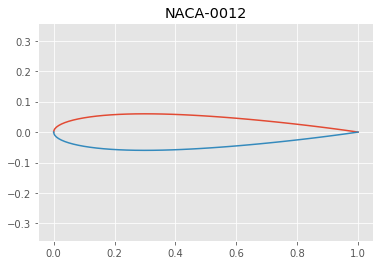

In [3]:
%run 1-Geometry.ipynb

---

## Computing the vortices

Compute the RHS, which depends on the incidence angle and the geometry. 

In [4]:
ITERATIONS_MAX     = 1e4
ITERATIONS_RESTART = ITERATIONS_MAX

In [5]:
%run 2-Solver.ipynb

In [6]:
gammas, cp, cl = solve(0.0)

Text(0.5, 1.0, 'Pressure distribution along the $x$-axis')

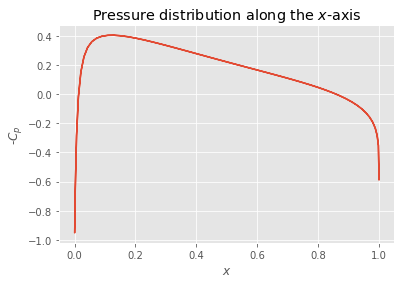

In [7]:
plt.plot(x_c, -cp)
plt.ylabel('-$C_p$');
plt.xlabel('$x$');
plt.title('Pressure distribution along the $x$-axis')